<a href="https://colab.research.google.com/github/Yuns-u/Codestates_Project/blob/main/n133a_high_dimensional_data_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [2]:
import numpy as np

#주어진 matrix만들기
matrix = np.array([[4,2],[2,4]])

#고유값과 고유벡터 구하기
from numpy import linalg
value, vector = np.linalg.eig(matrix) #결과값이 고유값과 고유벡터 둘 다 나온다.
value, vector

(array([6., 2.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [ ]:
#고유값과 고유벡터 구하기
#eigenvalue 1 = 6, eigenvector1 = [ 0.70710678, 0.70710678] #1행
#eigenvalue 2 = 2, eigenvector1 = [ -0.70710678, 0.70710678] #2행

In [3]:
#제출ㅁ
a = np.array([[11,10],[2,8]])
value, vector = np.linalg.eig(a)
value, vector

(array([14.21699057,  4.78300943]), array([[ 0.95195352, -0.84925584],
        [ 0.30624255,  0.52798155]]))

In [4]:
#제출폼
#고유값과 고유벡터 구하기
#eigenvalue 1 = 14.21699057, eigenvector1 = [ 0.95195352, 0.30624255] #1행
#eigenvalue 2 = 4.78300943, eigenvector1 = [ -0.84925584, 0.52798155] #2행

In [16]:
b = np.array([[1,7],[2,2]])
value, vector = np.linalg.eig(b)
value, vector

(array([-2.27491722,  5.27491722]), array([[-0.9057736 , -0.85343697],
        [ 0.42376194, -0.52119606]]))

In [18]:
round(0.42376194-0.9057736,3)

-0.482

In [ ]:
#제출폼
#고유값과 고유벡터 구하기
#eigenvalue 1 = -2.27491722, eigenvector1 = [ -0.9057736,  0.42376194] #1행
#eigenvalue 2 = 5.27491722, eigenvector1 = [-0.85343697, -0.52119606] #2행

## 2. Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 이후 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [5]:
#데이터셋 불러오기
import seaborn as sns
sns.get_dataset_names() #seaborn에 있는 데이터셋 확인하기 : 'penguins'일것이다.
raw_df = sns.load_dataset('penguins')
raw_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
#결측치 확인하고 처리하기
raw_df.isna().sum()
#위를 보아하니 측정을 못한 두 마리가 있다. 없는 존재라고 해도 무방할 것 같다.
raw_df = raw_df.dropna()

In [11]:
#feature들만 골라내기
features = raw_df.loc[:,'bill_length_mm':'body_mass_g']
#종류들로 라벨만들기 위해 뽑아내기
species = raw_df['species']

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = pd.DataFrame(scaler.fit_transform(features), columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])

In [13]:
#numerical feature 4개에 대해서 2차원으로 PCA를 시행
features.dtypes # float형이므로 연속형 수치형 데이터라는 것을 확인할 수 있다.

bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
dtype: object

In [14]:
##라이브러리르 이용해서 PCA하기
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
extracted_df = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])
extracted_df.head()

,PC1,PC2
0,-1.853593,0.032069
1,-1.316254,-0.443527
2,-1.376605,-0.161230
3,-1.885288,-0.012351
4,-1.919981,0.817598


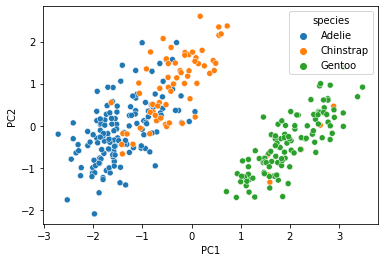

In [15]:
#시각화하기
sns.scatterplot(data=extracted_df, x='PC1', y = 'PC2', hue=species)

In [20]:
ratio = pca.explained_variance_ratio_
ratio

array([0.68633893, 0.19452929])

In [21]:
ratio[0]

0.6863389313599901

## 🔥 도전 과제

### "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


In [ ]:
# scree plot: 스크리 산점도라고 불리며 각 PC(주성분)의 Variation(분산)에 대한 그래프이다.
#주성분의 선택 판단 기준으로 사용되기도 한다.
#x축에 주성분을 놓고 y축에 해당 주성분에 대응하는 고유값을 연결한 그림으로 그래프가 완만해지는 부분 이전까지의 주성분을 활용

Text(0, 0.5, 'Eigen Value')

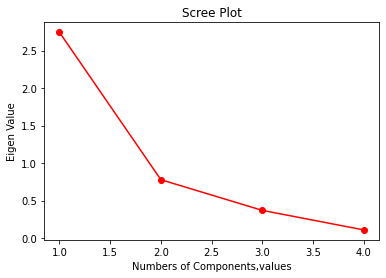

In [ ]:
#몇 개의 PC를 선택할 지 봐야하므로 4개의 PC를 모두 사용해서 확인해봐야할 것이다.

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Z = scaler.fit_transform(features)

pca_2 = PCA(4) #4차원 데이터를 사용해서 확인해보기
pca_fit_2 = pca_2.fit_transform(Z) ##이 함수에 대해 더 알아보기


standardized_data = (features - np.mean(features, axis=0))/np.std(features, ddof = 1, axis=0)
covariance_matrix = np.cov(standardized_data.T)

values, vectors = np.linalg.eig(covariance_matrix)
sing_vals = np.arange(len(values))+1

plt.plot(sing_vals, values, 'ro-')

plt.title('Scree Plot')
plt.xlabel('Numbers of Components,values')
plt.ylabel('Eigen Value')

#꺽이는 지점이 두 번째 이후부터 완만해진다만 몇 퍼센트 설명할 수 있는지는 알 수 없다.

[68.63389314 19.45292928  9.21606299  2.69711459]


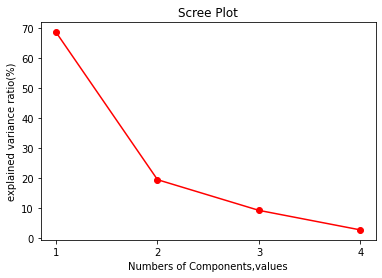

In [ ]:
#몇 퍼센트 설명할 수 있는지 알아보기 
per_var = pca_2.explained_variance_ratio_*100 #총합이 99.99999로 100이라고 할 수 있다.
labels = ['1','2','3','4']

plt.plot(labels, per_var, 'ro-',)
plt.title('Scree Plot')
plt.xlabel('Numbers of Components,values')
plt.ylabel('explained variance ratio(%)')

print(per_var)

#그래프의 완만하게 꺾이는 지점과 PCA를 90%이상 설명하려면 3개의 PC를 사용해서 약 97.3%를 설명해야 한다.